In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
def BrownianMotion(T, malha):
    """
    T: final time
    malha: number of discretized brownian motion till time T
    """
    dt = T/malha
    ts = np.arange(0, T+dt, dt)
    dws = np.random.normal(0, dt**(1/2), len(ts))
    wiener = np.cumsum(dws)
    
    return ts, dws, wiener

In [3]:
def StochasticIntegral(T, malha):
    """
    T: final time
    malha: number of discretized brownian motion till time T
    """
    ts, dws, wiener = BrownianMotion(T, malha)
    wiener = list(wiener)
    wiener.insert(0, 0)   # Coloco o 0 como primeiro elemento, e retiro o W_n
    integral = np.cumsum(wiener[:-1] * dws)

    return ts, wiener, integral

In [4]:
T = 1
malha = 2000
n_sim = 12000

hist_integral = []
analiticas = []
gamma_approxs = []
for _ in range(n_sim):
    ts, wiener, integral = StochasticIntegral(T, malha)
    analitica = (wiener[-1] ** 2) / 2 - T/2
    gamma_approx = -T/2 + 1 / 2 * np.random.gamma(1/2 , T)

    hist_integral.append(integral[-1])
    analiticas.append(analitica)
    gamma_approxs.append(gamma_approx)

In [5]:
all_data = np.concatenate([analiticas, hist_integral, gamma_approxs])
min_val = all_data.min()
max_val = all_data.max()

bins = np.linspace(min_val, max_val, 25)

data_list = [analiticas, hist_integral, gamma_approxs]
labels = ['Solução Analítica', 'Aproximação', 'Aproximação Gamma']
xticks = [x for x in np.arange(-1, 4.5, 0.5)]

C:\Users\epedr\AppData\Local\Temp\ipykernel_19068\2813333665.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(gs[i, 0], sharex=plt.subplot(gs[0, 0]), sharey=plt.subplot(gs[0, 0]))


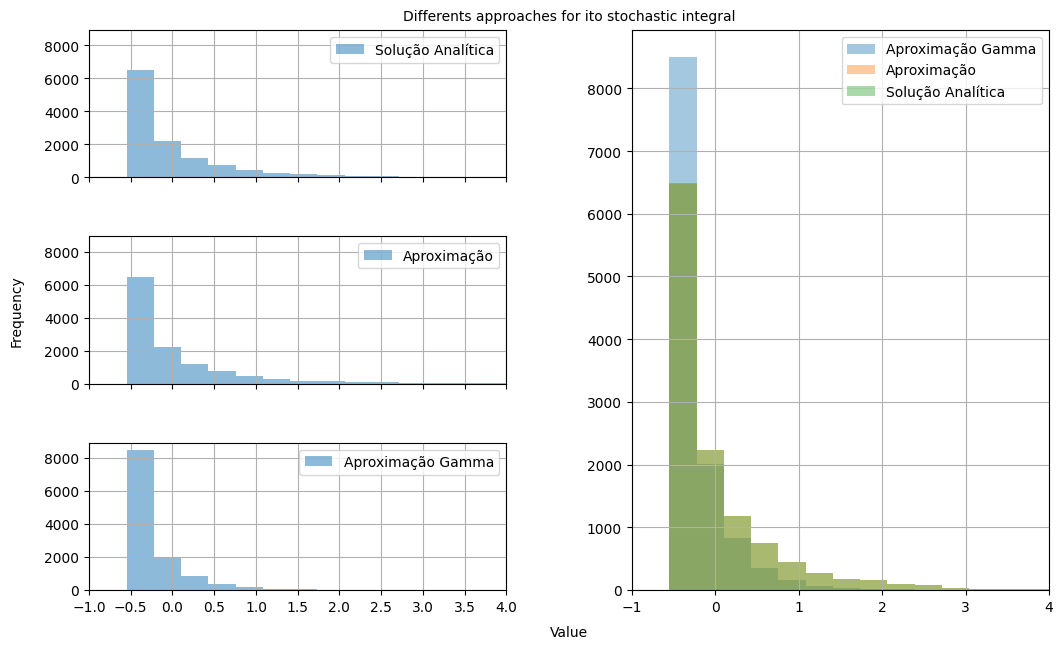

In [6]:
fig = plt.figure(figsize=(12, 7))
gs = gridspec.GridSpec(3, 2, width_ratios=[3, 3])

for i in range(3):
    ax = plt.subplot(gs[i, 0], sharex=plt.subplot(gs[0, 0]), sharey=plt.subplot(gs[0, 0]))
    ax.hist(data_list[i], bins=bins, alpha=0.5)
    ax.legend([labels[i]])
    ax.grid()
    if i < 2:
        plt.setp(ax.get_xticklabels(), visible=False)
    else:
        ax.set_xticks(xticks)

plt.subplot(gs[0, 0]).set_xlim(min(xticks), max(xticks))

ax4 = plt.subplot(gs[:, 1])
for i in range(3):
    ax4.hist(data_list[-i-1], bins=bins,label=labels[-i-1], alpha=0.4)

ax4.set_xlim(min(xticks), max(xticks))
ax4.grid()
ax4.legend()

fig.text(0.5, 0.92, 'Differents approaches for ito stochastic integral', ha='center', va='center')
fig.text(0.5, 0.04, 'Value', ha='center', va='center')
fig.text(0.04, 0.5, 'Frequency', ha='center', va='center', rotation='vertical')

plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.4, left=0.1, bottom=0.1, right=0.9, top=0.9)

plt.show()
